In [2]:
import os
import glob
import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [3]:
util.set_sns_style(style='dark')
%matplotlib notebook


In [4]:
root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
experiment = 'Spontaneous_edge_tracking' 

fig_id = os.path.join(root_dir.split('/My Drive')[1], experiment)
src_dir = os.path.join(root_dir, experiment)
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}/rdp'.format(experiment)
save_dir = save_dir.replace(" ", "")

print("Saving figures to:{}    {}".format('\n', save_dir))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/Spontaneous_edge_tracking/rdp


In [8]:
log_files = sorted([k for k in glob.glob(os.path.join(src_dir, '*.log'))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))
for ix, f in enumerate(log_files):
    print(ix, os.path.split(f)[-1])

Found 13 tracking files.
0 05302022-190526_constantOdor_Fly0.log
1 06022022-133201_CantonS_constantOdor_Fly1.log
2 06022022-143134_CantonS_constantOdor_Fly2**.log
3 06022022-163857_CantonS_constantOdor_Fly3.log
4 06092022-155055_spontaneousTracking_Fly1.log
5 06092022-161935_spontaneousTrackingFly2.log
6 06092022-171500_SpontaneousTracking_Fly3.log
7 06092022-183500_SpontaneousTracking_Fly4.log
8 06132022-115953_SpontaneousTracking_Fly5.log
9 06132022-123909_SpontaneousTracking_Fly6.log
10 06132022-131030_SpontaneousTracking_Fly7.log
11 06132022-153709_SpontaneousTracking_Fly8.log
12 06132022-164625_SpontaneousTracking_Fly9.log


In [17]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [18]:
ix=0 # fly_id = '20220530-fly0'
fpath = log_files[ix]
exp, datestr, fly_id, cond = butil.parse_info_from_file(fpath)

df0 = butil.load_dataframe(fpath, mfc_id=None, verbose=False, cond=None)


In [19]:
df0['condition']

0        constantodor
1        constantodor
2        constantodor
3        constantodor
4        constantodor
             ...     
86878    constantodor
86879    constantodor
86880    constantodor
86881    constantodor
86882    constantodor
Name: condition, Length: 86883, dtype: object

In [20]:
df0 = butil.process_df(df0, smooth=False) #, conditions=['odor'])

In [25]:
strip_width=50
strip_sep=200
ogrid = butil.get_odor_grid(df0, strip_width=strip_width, strip_sep=strip_sep,
                                use_crossings=True, verbose=False)
oparams = butil.get_odor_params(df0)
oparams

{'trial_start_time': 1653951986.806175,
 'odor_start_time': 1653951986.806175,
 'odor_boundary': (-18.159227354771502, 31.840772645228498),
 'odor_start_pos': (6.840772645228499, 30.949741762767),
 'entry_left': True}

In [33]:
df = df0[df0['time']>=oparams['odor_start_time']].copy()

<IPython.core.display.Javascript object>


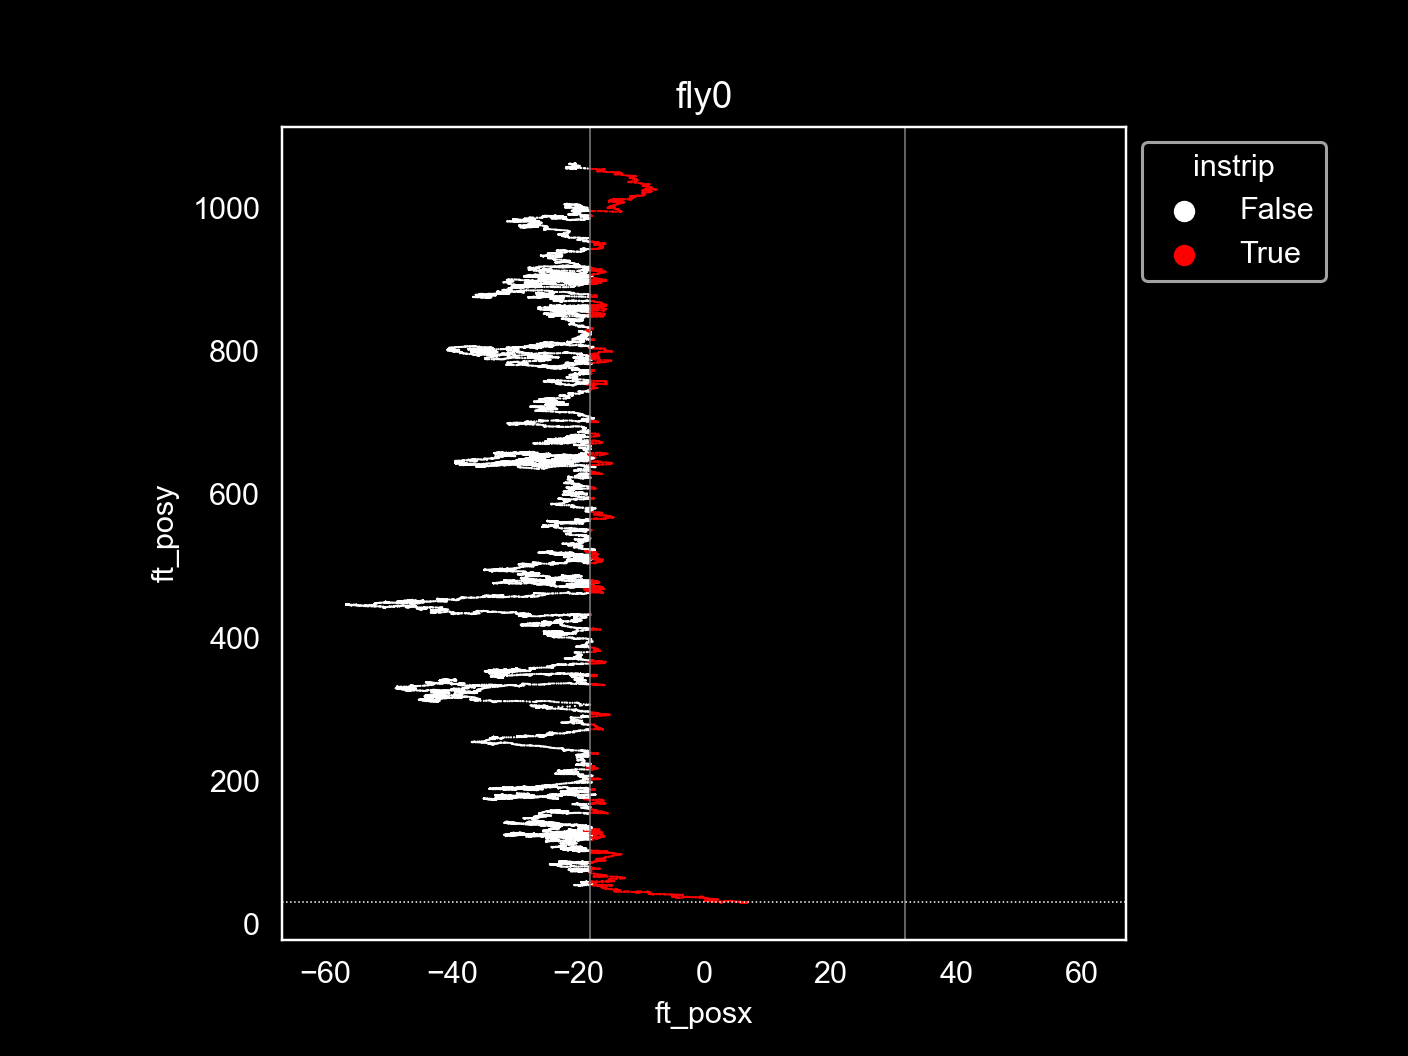

Text(0.5, 1.0, 'fly0')

In [27]:
fig, ax= pl.subplots()
butil.plot_trajectory(df, odor_bounds=oparams['odor_boundary'], ax=ax)
ax.set_title(fly_id)

# smooth

In [28]:
import numpy as np
import scipy.interpolate as interp

def interpolate_polyline(polyline, num_points):
    duplicates = []
    for i in range(1, len(polyline)):
        if np.allclose(polyline[i], polyline[i-1]):
            duplicates.append(i)
    if duplicates:
        polyline = np.delete(polyline, duplicates, axis=0)
    tck, u = interp.splprep(polyline.T, s=0)
    u = np.linspace(0.0, 1.0, num_points)
    return np.column_stack(interp.splev(u, tck))

In [29]:
smooth = True
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
# for varname in ['ft_posx', 'ft_posy']:
#     df = butil.smooth_traces(df, varname=varname, window_size=smooth_window)
# df = butil.smooth_path(df)

In [281]:
# bnum = 41 #59 #25
# smooth_full=True
# if smooth_full:
#     df = butil.smooth_path(df, s=10) 
#     b_ = df[df['boutnum']==bnum].copy()
# else:
#     b_ = df[df['boutnum']==bnum].copy()
#     b_ = butil.smooth_path(b_, s=5) 
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [283]:
df = butil.smooth_traces_interp(df, window_size=10) 

<IPython.core.display.Javascript object>


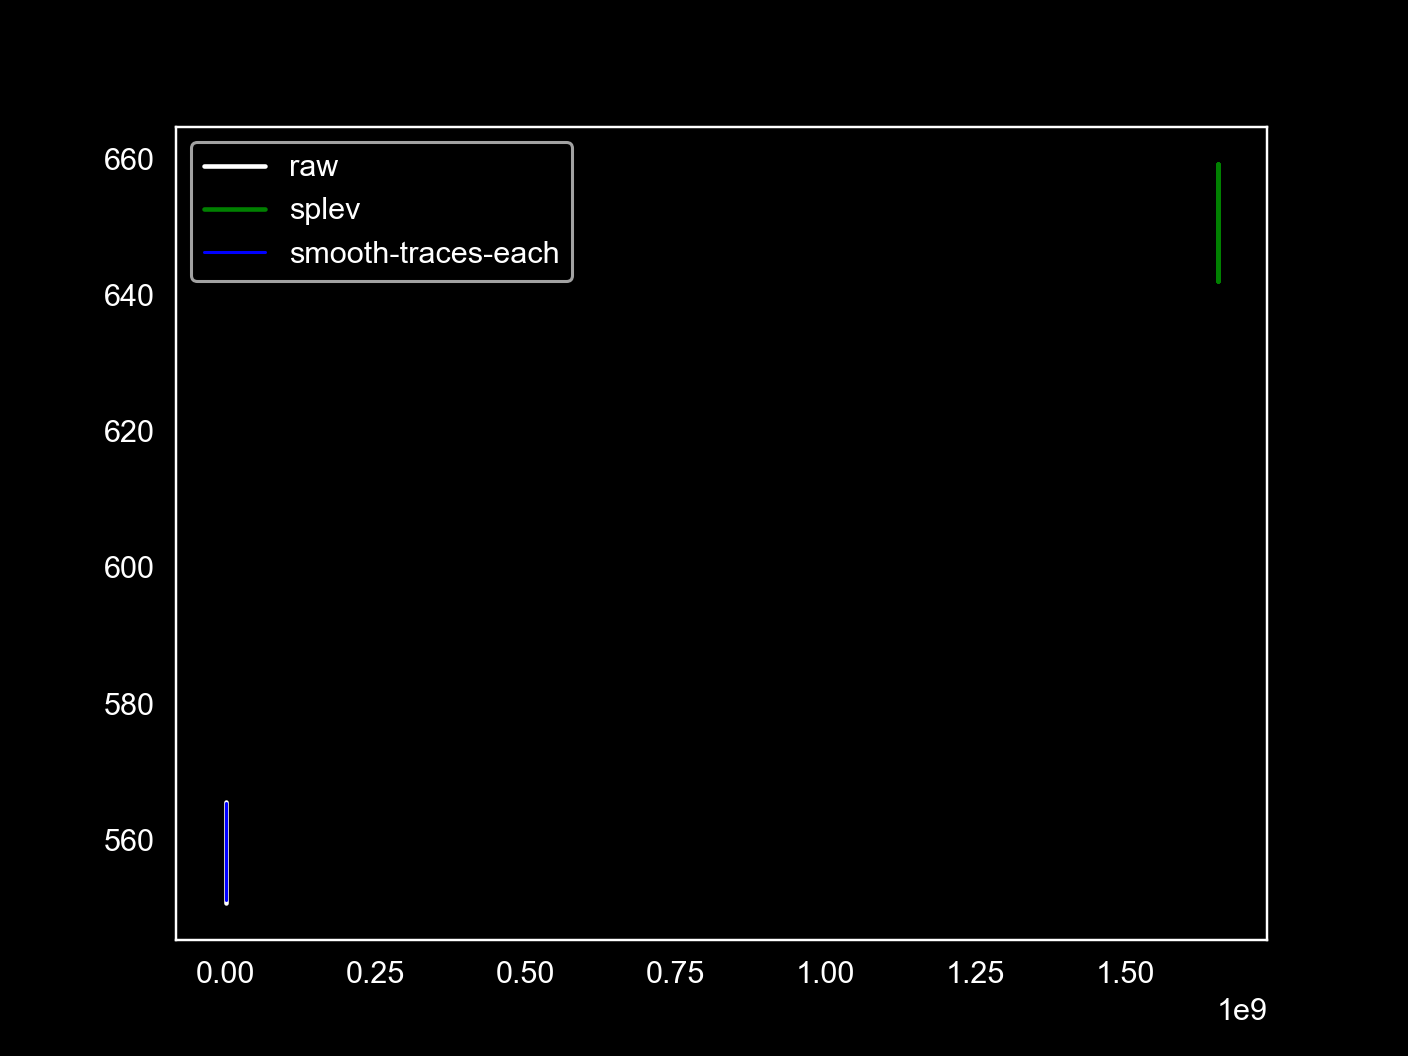

In [292]:
arr = b_[['ft_posx', 'ft_posy']].values
x, y = zip(*arr)
#create spline function
#B = interpolate_polyline(arr, 500)
fig, ax= pl.subplots()
ax.plot(x, y, 'w', label='raw')
#ax.plot(B[:, 0], B[:, 1], 'b', lw=0.6, label='polyline')

# use splprep to interpolate

ax.plot(b_['smoothed_ft_posx'], b_['smoothed_ft_posy'], label='splev', color='green')

#create spline function
# arr = b_[['ft_posx', 'ft_posy']].values
# x, y = zip(*arr)
# f, u = sp.interpolate.splprep([x, y], s=0, per=False)
# #create interpolated lists of points
# xint, yint = sp.interpolate.splev(np.linspace(0, 1, 500), f)
#ax.plot(xint, yint, 'green', lw=0.5, label='splprep')

# temporal_downsample in utils:
y_s = butil.smooth_traces_each(b_, varname='ft_posy', window_size=13, return_same=False)
x_s = butil.smooth_traces_each(b_, varname='ft_posx', window_size=13, return_same=False)
ax.plot(b_['ft_posx'], y_s, label='smooth-traces-each', c='b', lw=1)


ax.legend()

In [81]:
import scipy as sp

In [237]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [238]:
# xint, yint = butil.smooth_traces(df, xvar='ft_posx', yvar='ft_posy', 
#                                  window_size=13, return_same=False)
arr = df[['ft_posx', 'ft_posy']].values
x, y = zip(*arr)
x=np.arange(0, len(y))
#create spline function
f, u = sp.interpolate.splprep([x, y], s=13, per=False)
#create interpolated lists of points
xint, yint = sp.interpolate.splev(np.linspace(0, 1, len(x)), f)

df['xint'] = xint
df['yint'] = yint

In [274]:

df['xint'] = xint
df['yint'] = yint

In [247]:
# do gaus
ygaus = sp.ndimage.filters.gaussian_filter1d(y, sigma=11)
df['ygaus'] = ygaus

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_27014/1411121710.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ygaus = sp.ndimage.filters.gaussian_filter1d(y, sigma=11)


In [227]:
# do smoothing, each
y_full = butil.smooth_traces_each(df, varname='ft_posy', window_size=21, return_same=False)
x_full = butil.smooth_traces_each(df, varname='ft_posx', window_size=21, return_same=False)

df['xeach'] = x_full
df['yeach'] = y_full

In [199]:
# get indices for bout
#bnum = 2 #59 #25
#b_ = df[df['boutnum']==bnum].copy()
# ixs = [df.index.tolist().index(i) for i in b_.index.tolist()]

In [279]:
df['time']

2080     1.653952e+09
2081     1.653952e+09
2082     1.653952e+09
2083     1.653952e+09
2084     1.653952e+09
             ...     
86878    1.653954e+09
86879    1.653954e+09
86880    1.653954e+09
86881    1.653954e+09
86882    1.653954e+09
Name: time, Length: 84803, dtype: float64

<IPython.core.display.Javascript object>


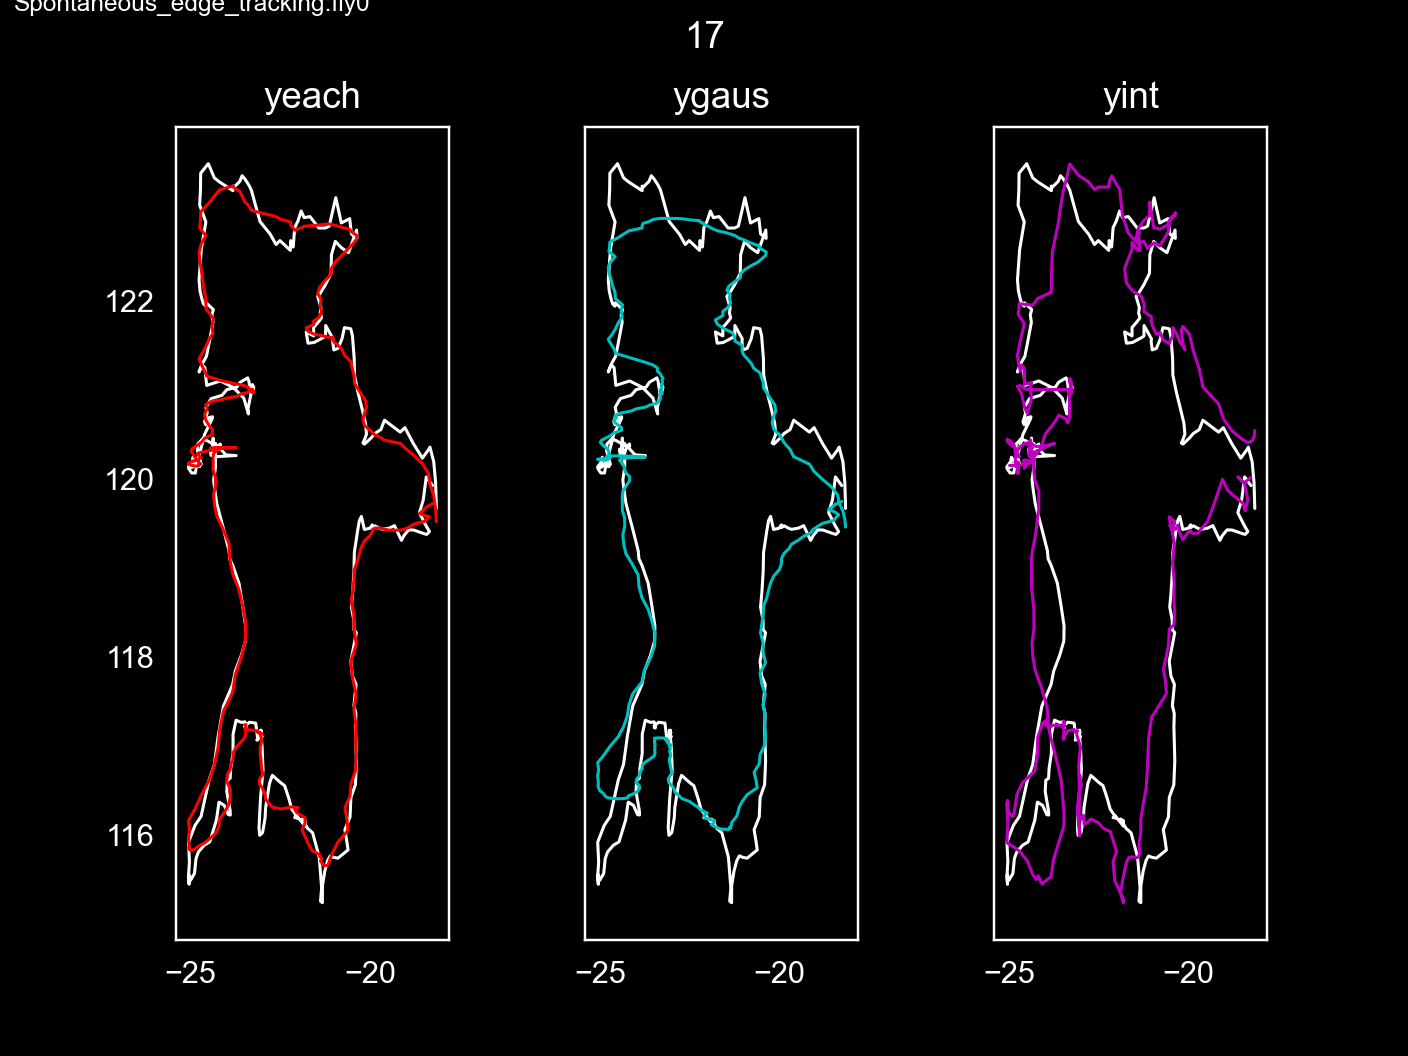

<IPython.core.display.Javascript object>


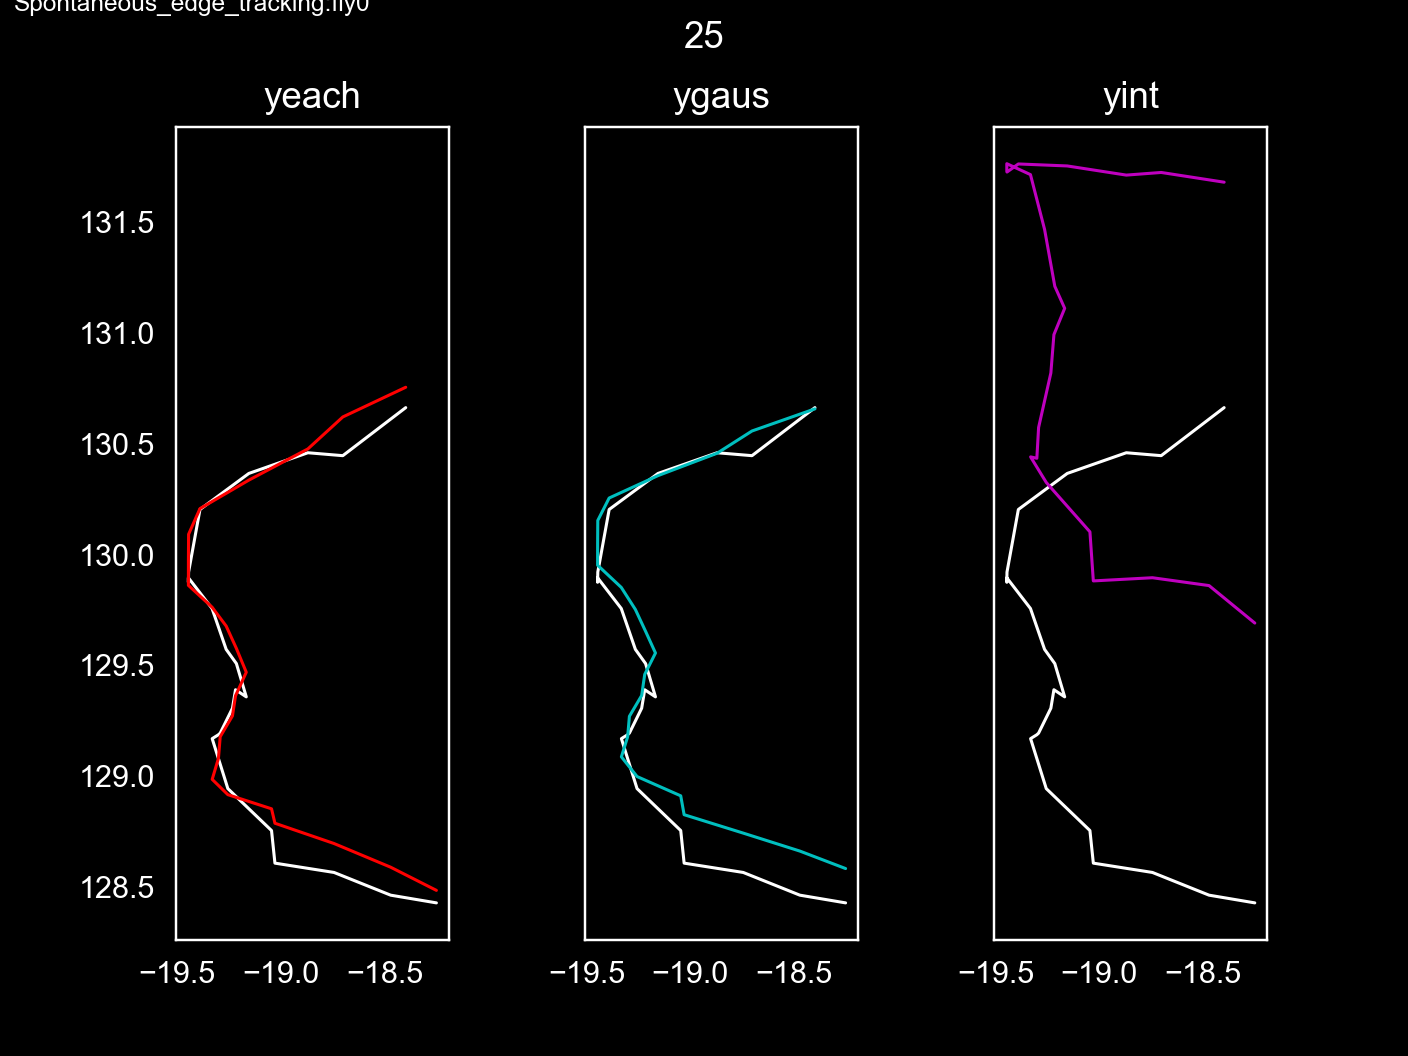

<IPython.core.display.Javascript object>


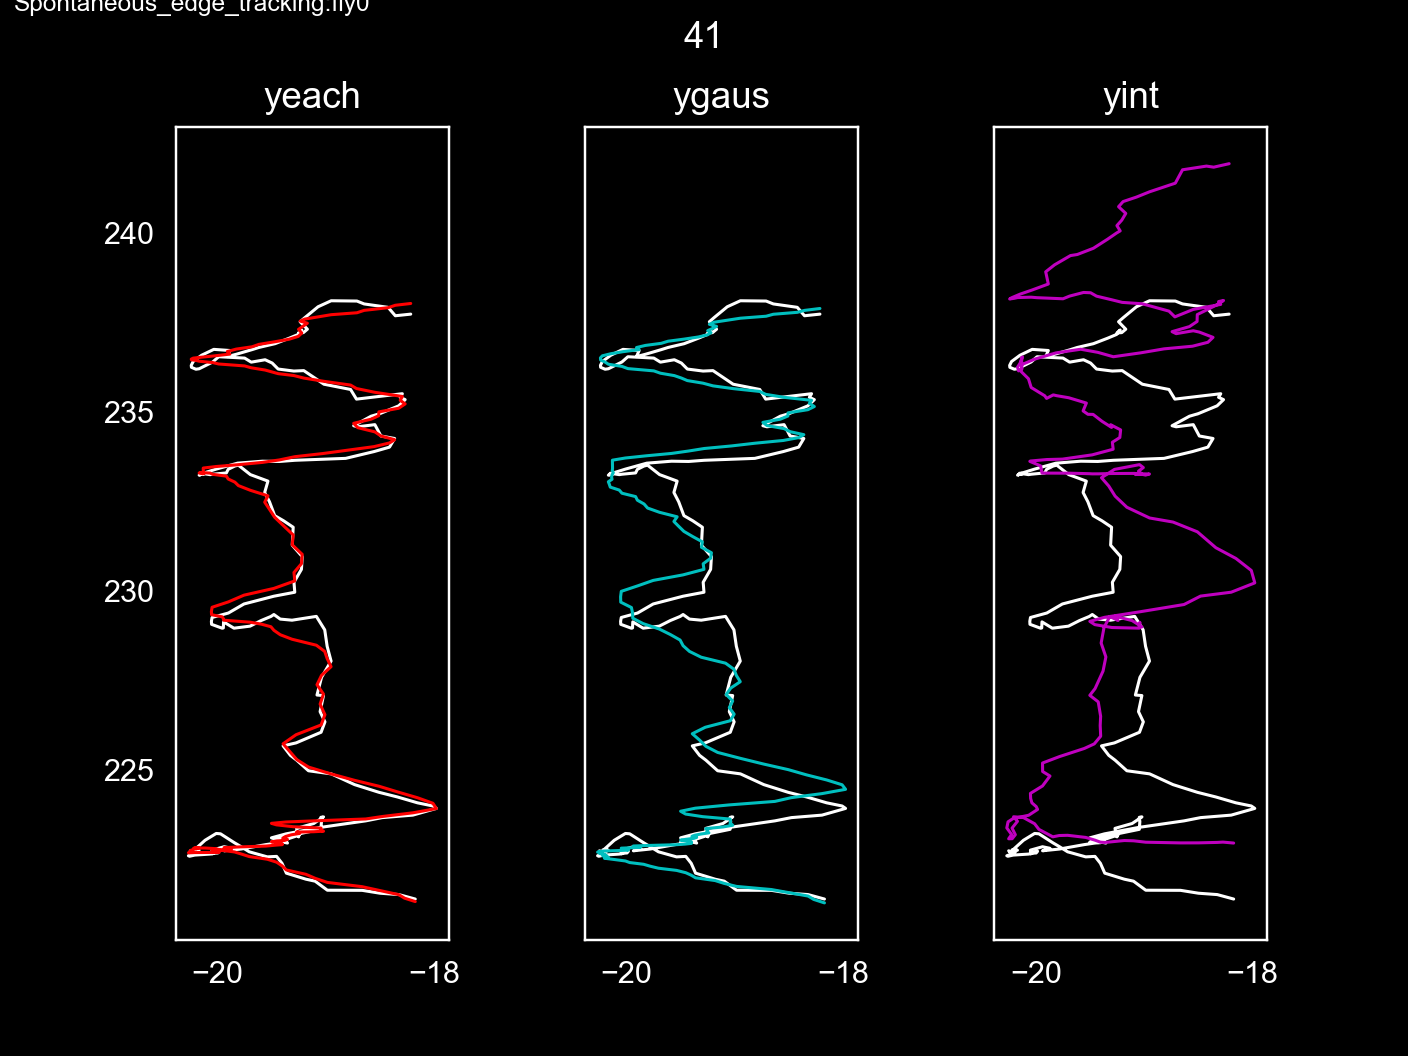

<IPython.core.display.Javascript object>


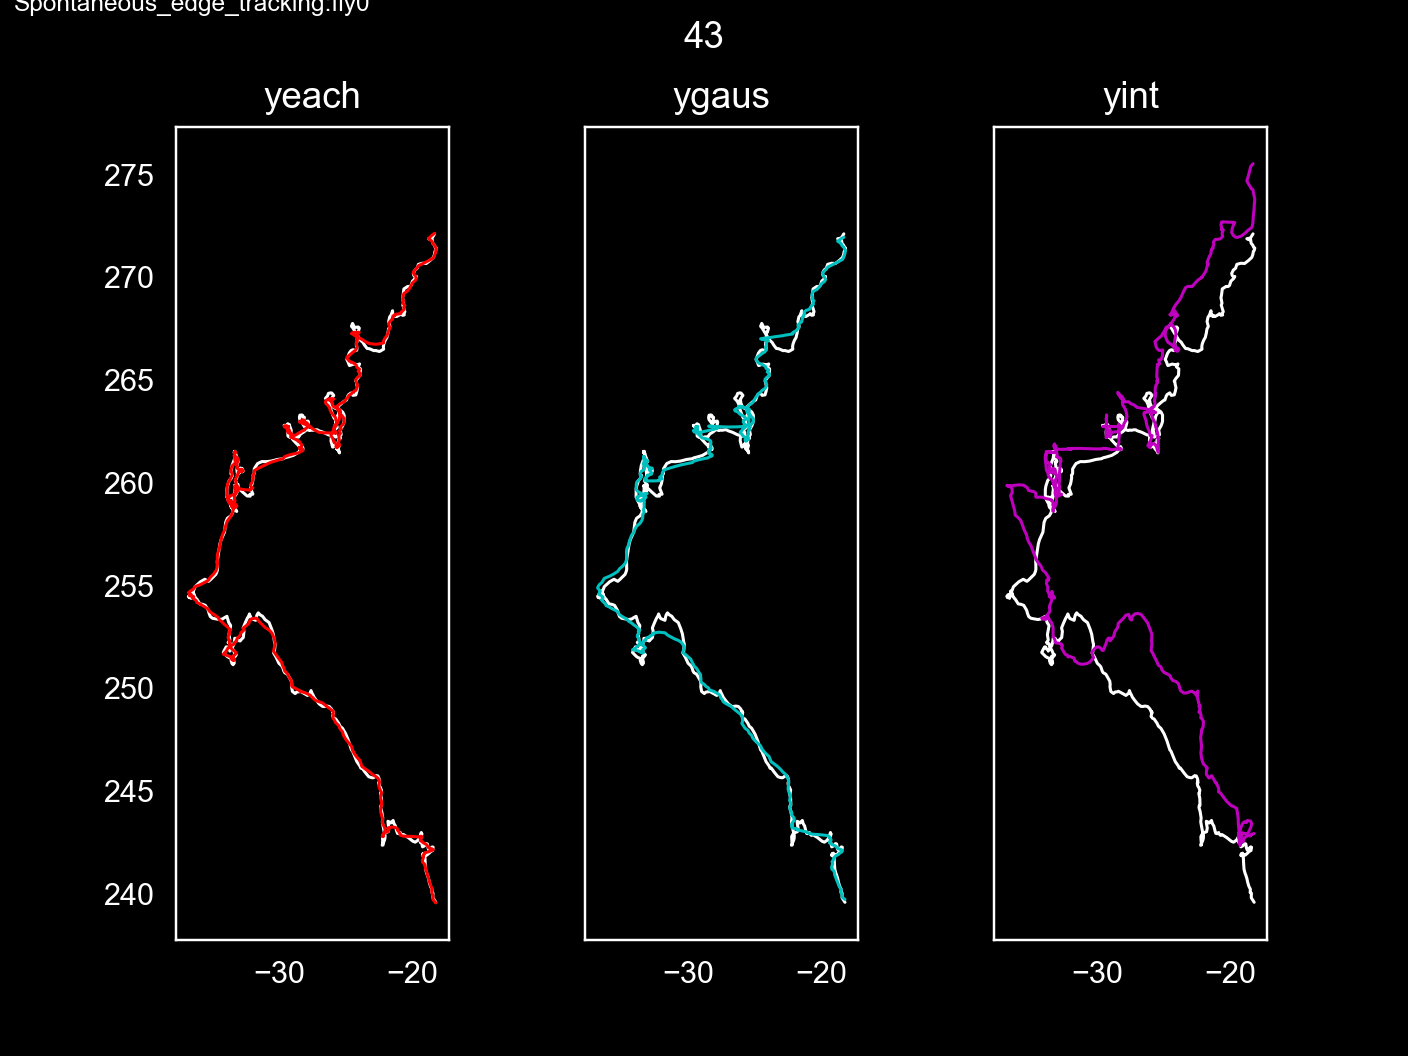

<IPython.core.display.Javascript object>


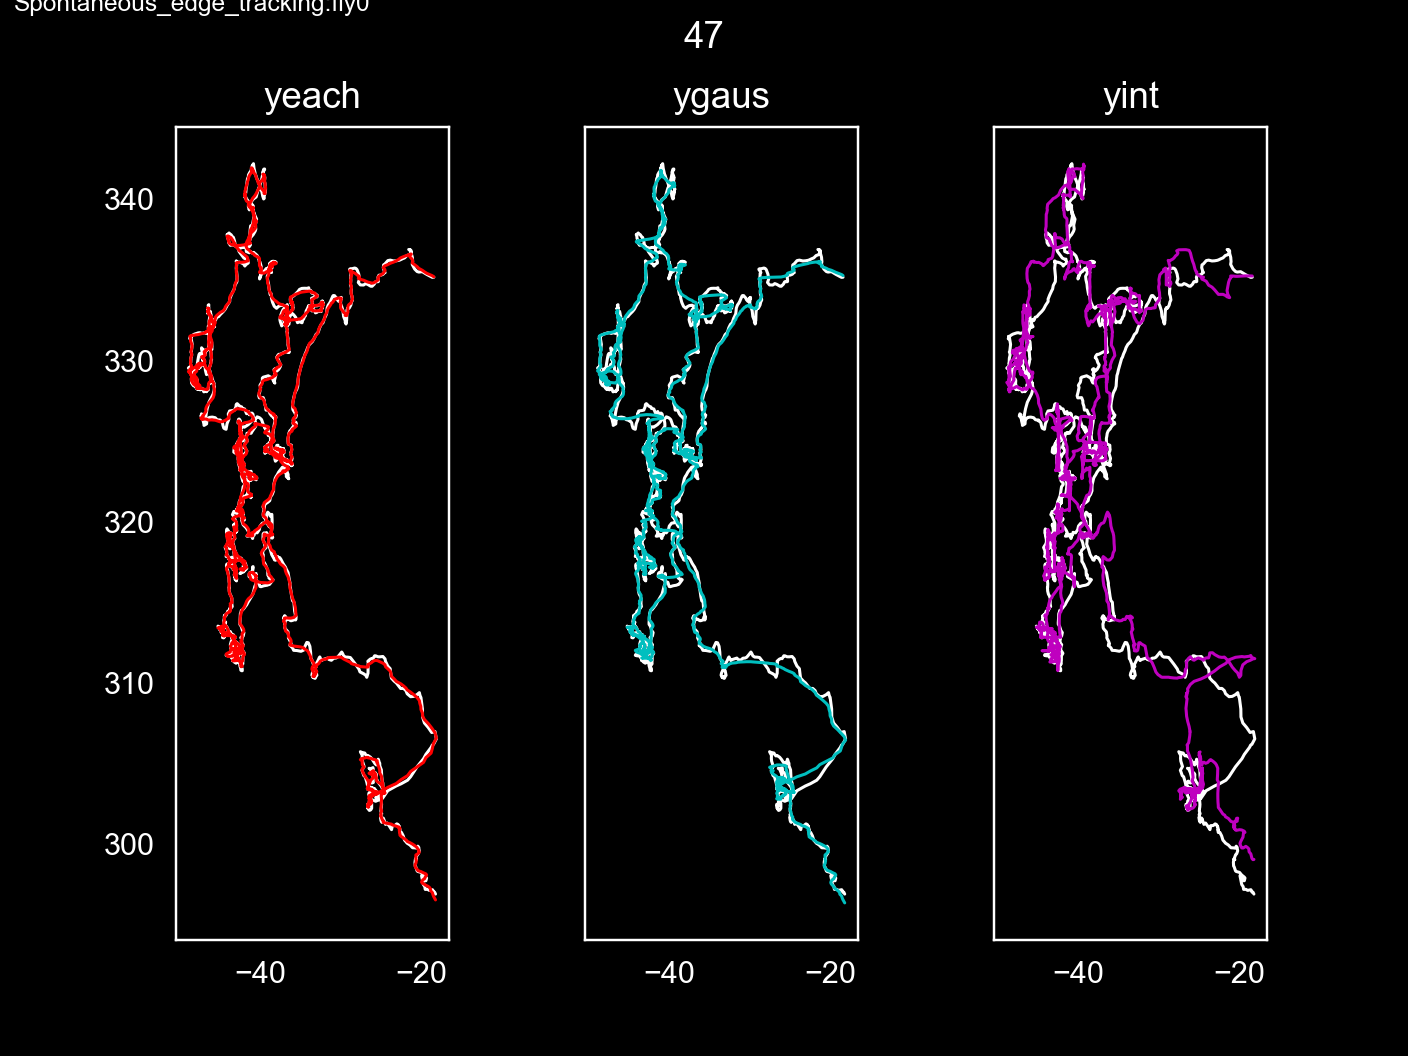

<IPython.core.display.Javascript object>


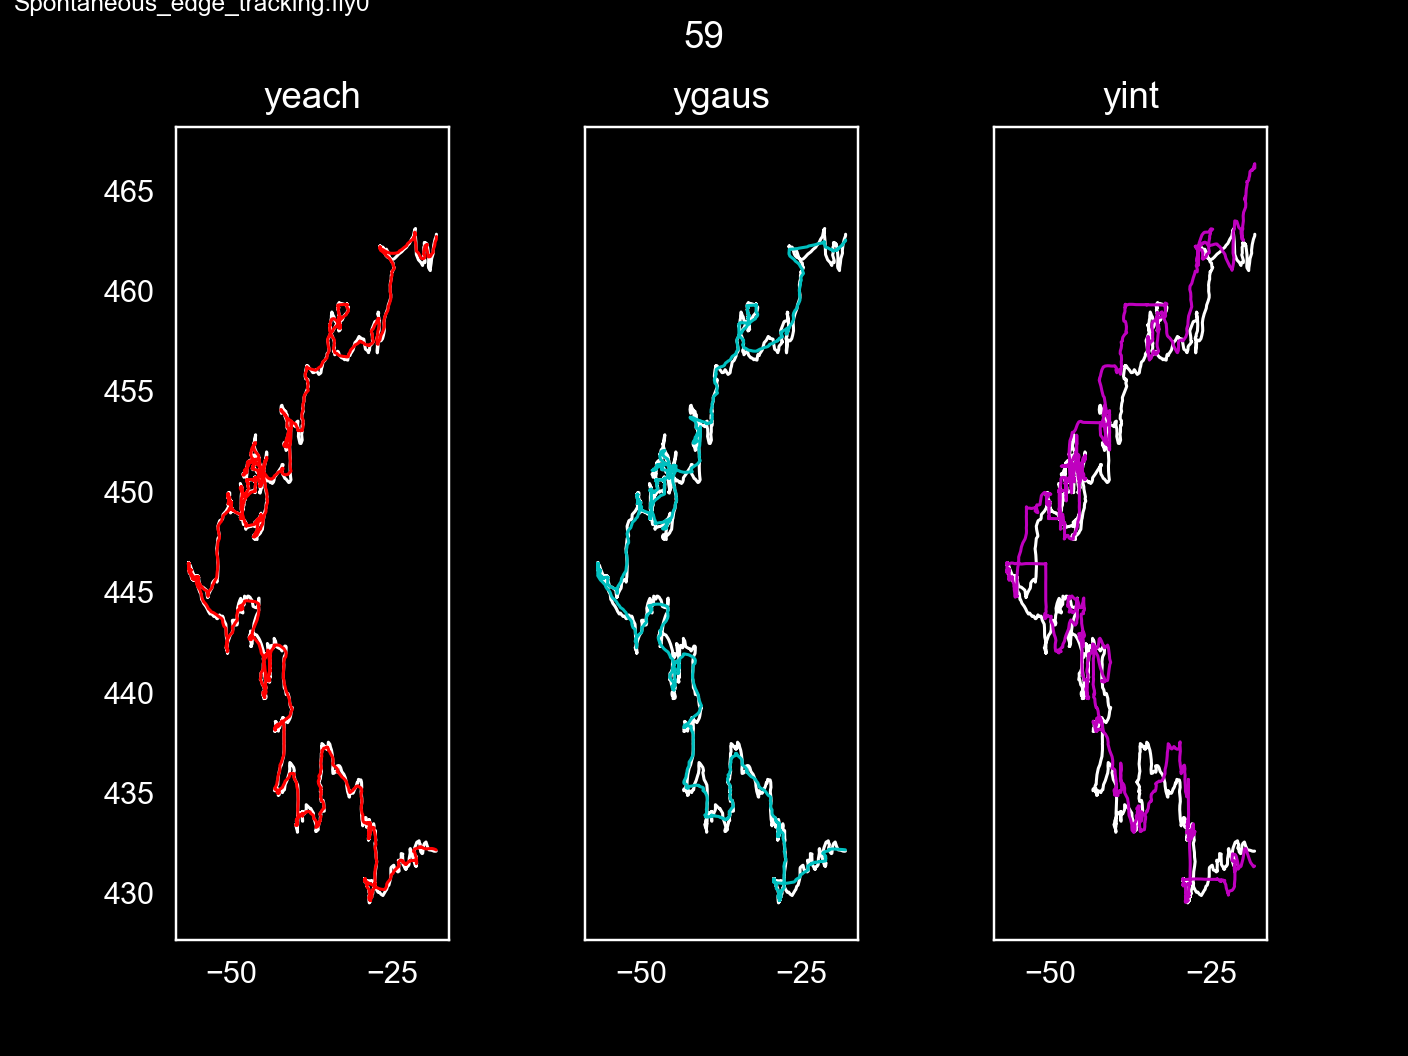

<IPython.core.display.Javascript object>


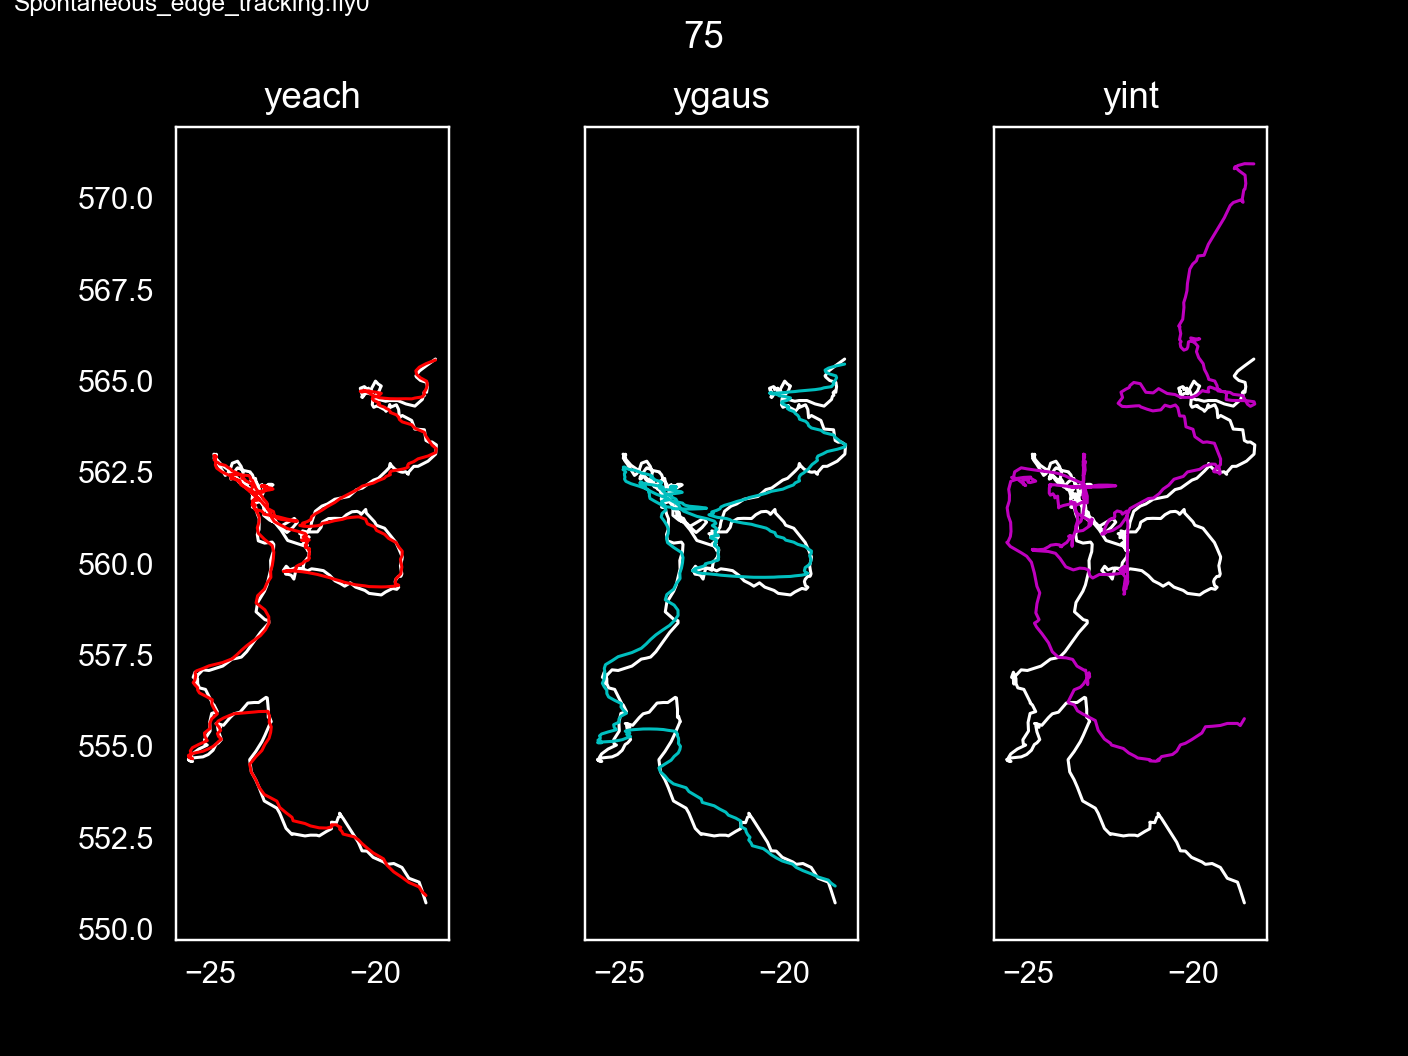

In [294]:
test_bouts = [17, 25, 41, 43, 47, 59, 75 ] #bnum = 75 #25 #41 #59 #25
for bnum in test_bouts:
    b_ = df[df['boutnum']==bnum].copy()
    smooth_opts = ['yeach', 'ygaus', 'yint']
    cols = ['r', 'c', 'm']
    fig, axn = pl.subplots(1,3, sharex=True, sharey=True)
    for ax, smoothvar, c in zip(axn.flat, smooth_opts, cols):
        ax.plot(b_['ft_posx'].values, b_['ft_posy'], 'w', lw=1)
        ax.plot(b_['ft_posx'].values, b_[smoothvar], c, lw=1)
        ax.set_title(smoothvar)
    # ax.plot(b_['ft_posx'].values, b_['yeach'], 'c', lw=0.5)
    # ax.plot(b_['ft_posx'], b_['yint'], 'm', lw=0.5)
    fig.suptitle(bnum)
    pl.subplots_adjust(wspace=0.5)
    util.label_figure(fig, '{}:{}'.format(experiment, fly_id))



<IPython.core.display.Javascript object>


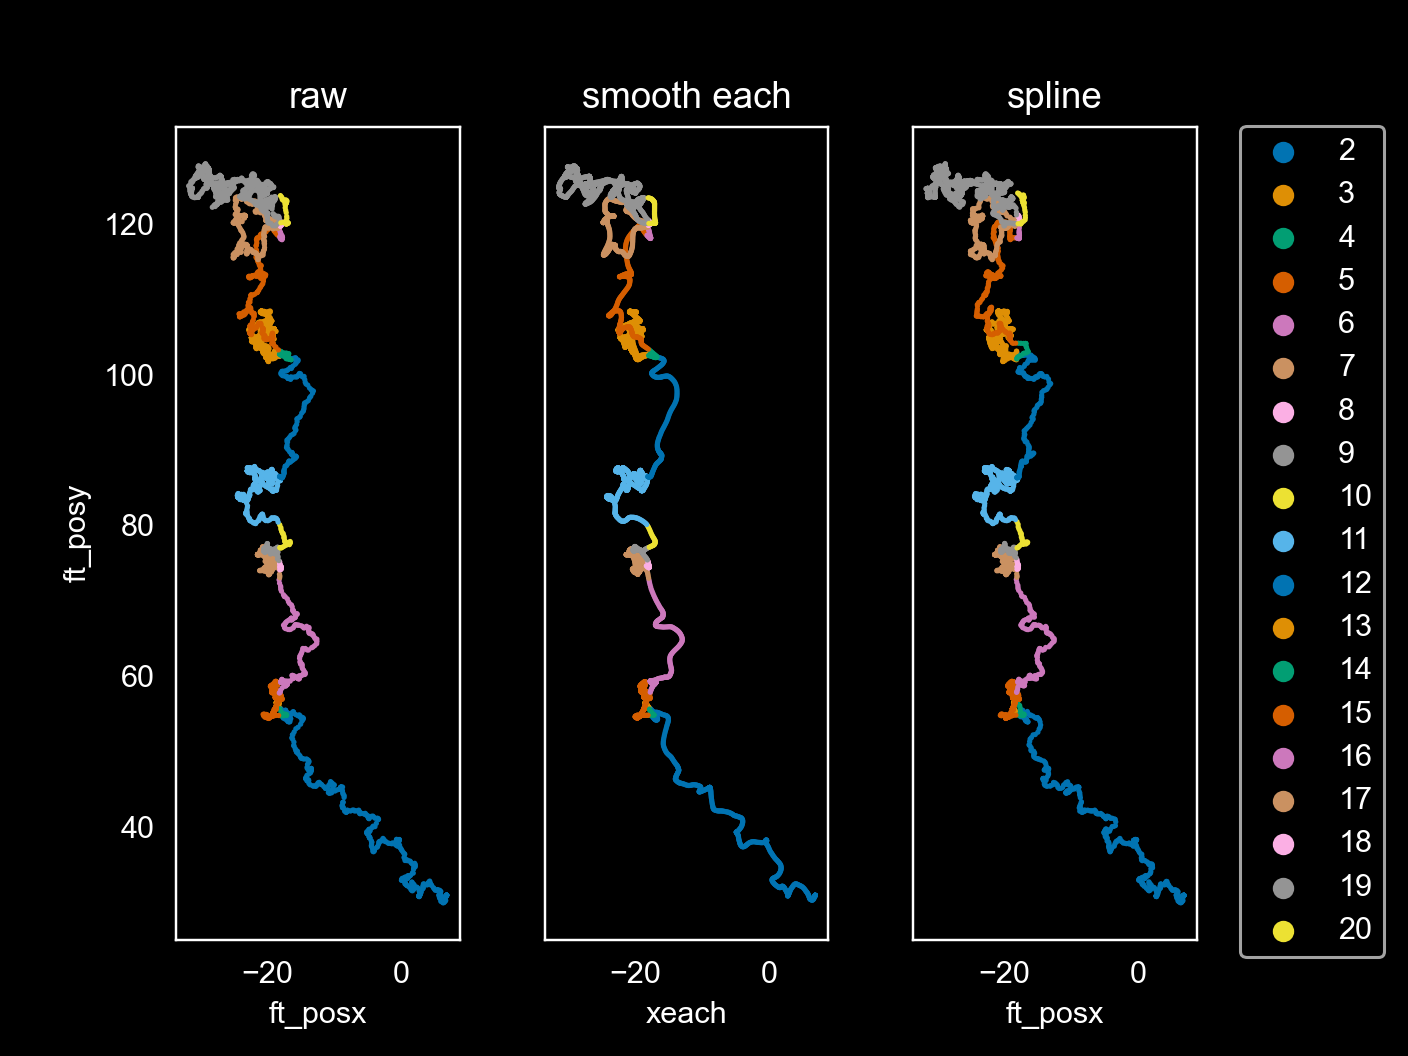

In [289]:
plotdf = df[df['boutnum']<=20]
fig, axn= pl.subplots(1, 3, sharey=True, sharex=True)
ax=axn[0]; ax.set_title('raw')
sns.scatterplot(data=plotdf, x='ft_posx', y='ft_posy',s=3, hue='boutnum', palette='colorblind',
                edgecolor='none', ax=ax)
ax.legend_.remove() #(bbox_to_anchor=(1, 1.1), loc='upper left')

ax=axn[1]; ax.set_title('smooth each')
sns.scatterplot(data=plotdf, x='xeach', y='yeach',s=3, hue='boutnum', palette='colorblind',
                edgecolor='none', ax=ax)
ax.legend_.remove() #(bbox_to_anchor=(1, 1.1), loc='upper left')

#ax.plot(df['ft_posx'], df['ft_posy'], color='w', lw=0.6)
#ax.plot(b_['ft_posx'], b_['ft_posy'], color='g')
ax=axn[2]; ax.set_title('spline')
sns.scatterplot(data=plotdf, x='ft_posx', y='yint',s=3, hue='boutnum', palette='colorblind',
                edgecolor='none', ax=ax)
#sns.scatterplot(data=b_, x='ft_posx', y='yint',s=3, c='w', ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.02), loc='upper left')
pl.subplots_adjust(wspace=0.3, right=0.85)

<IPython.core.display.Javascript object>


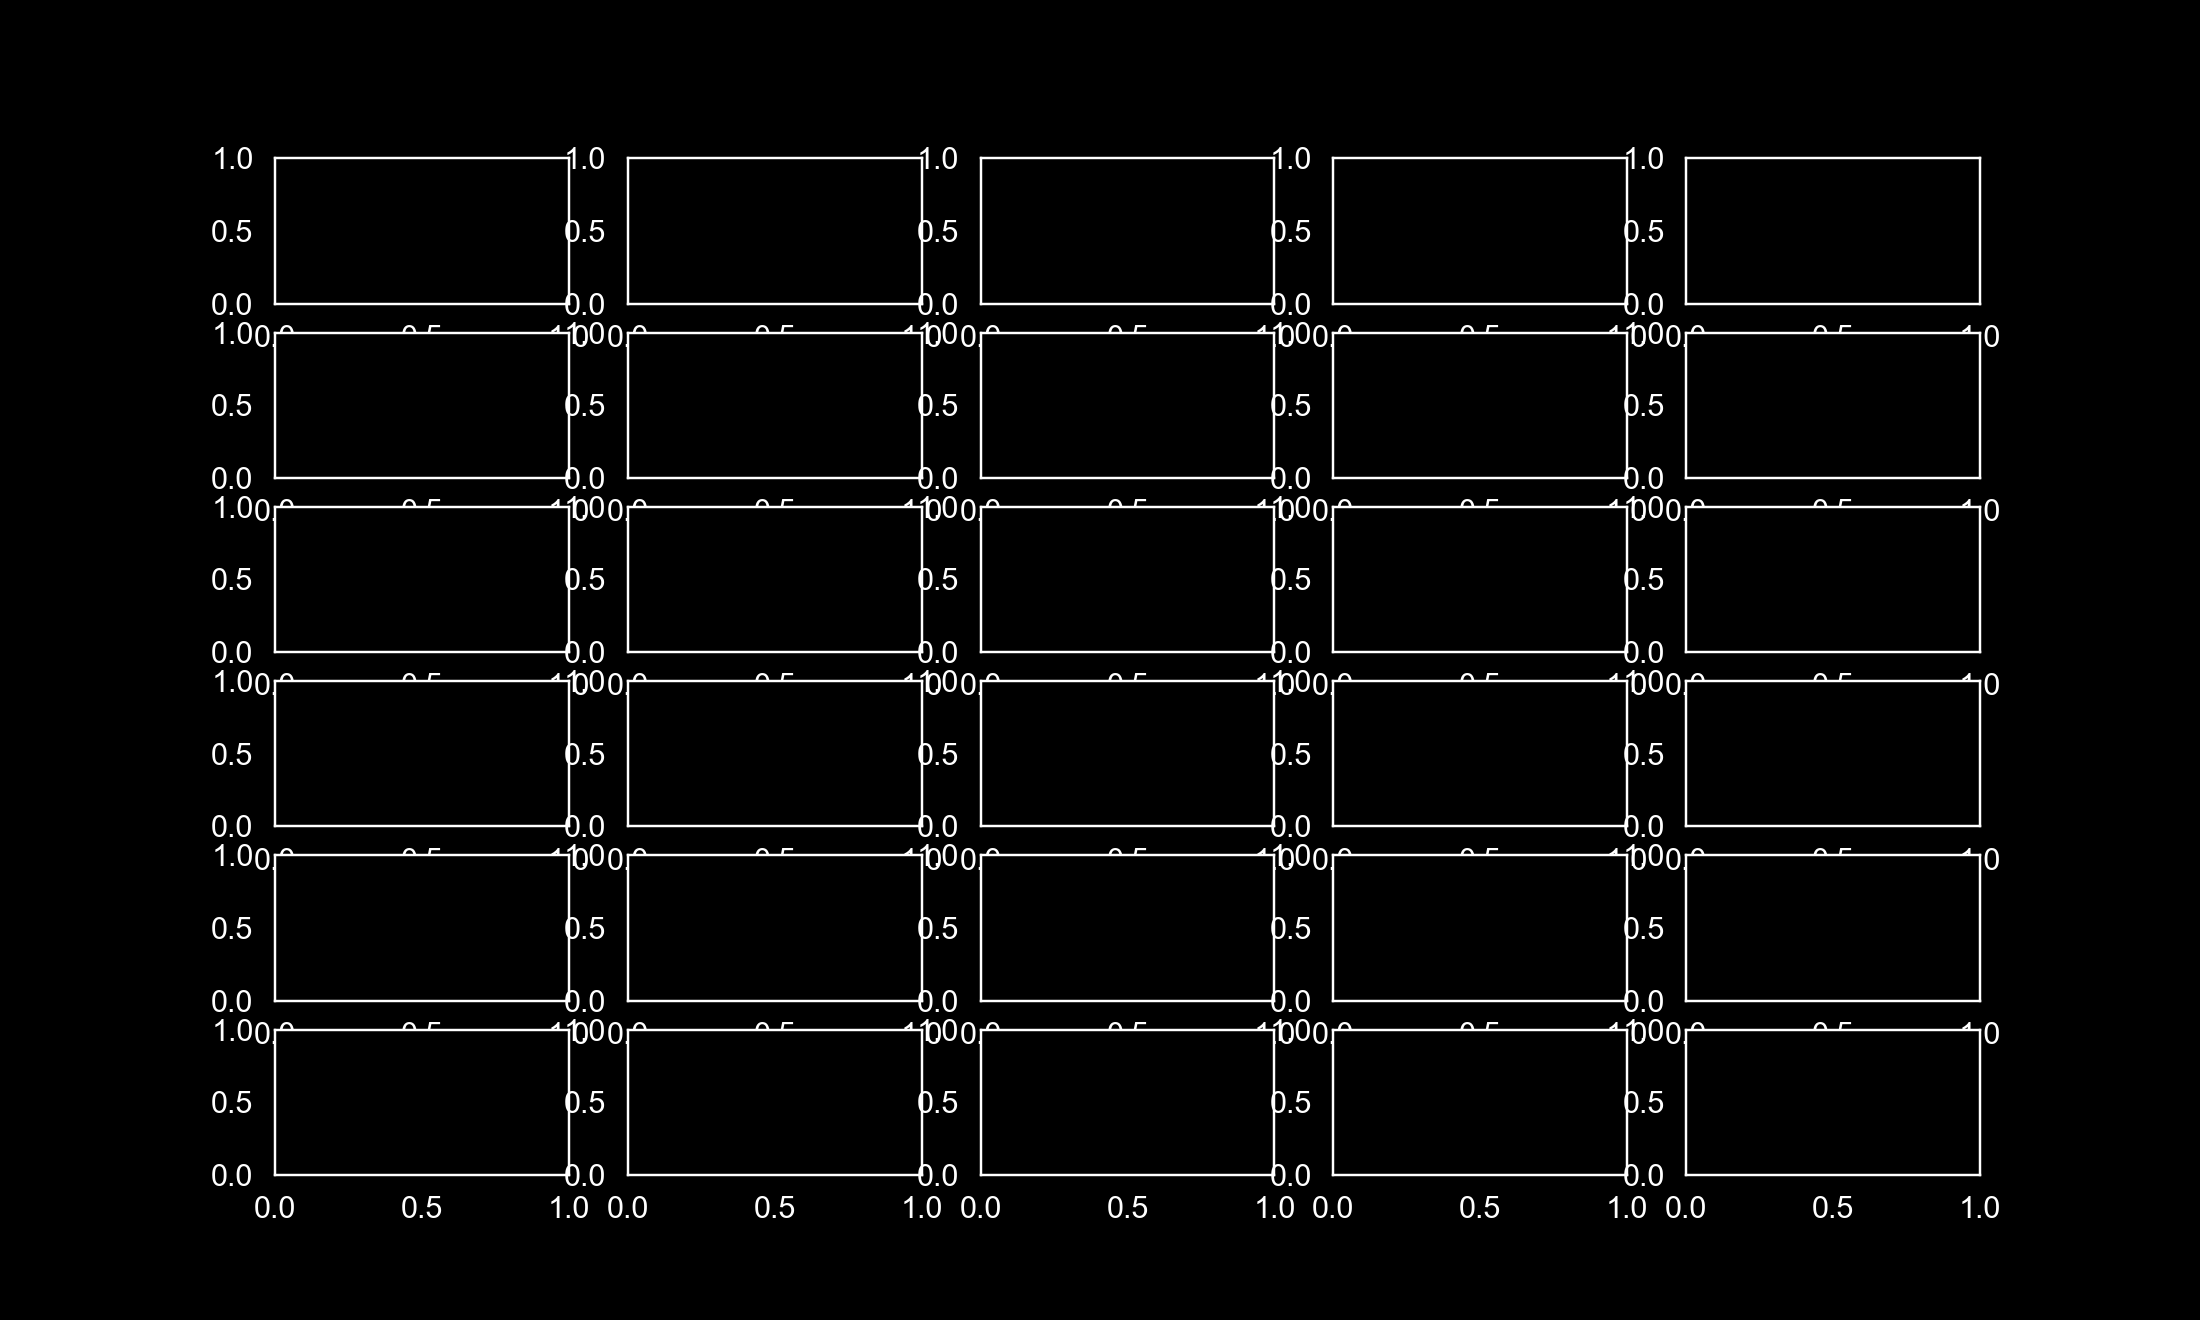

KeyError: "None of [Index(['smoothed_ft_posx', 'smoothed_ft_posy'], dtype='object')] are in the [columns]"

In [268]:
distvar='crosswind_dist'
nr=6
nc=5
plotdf = df.copy() #[df['boutnum'].isin(long_dists)]
fig = butil.plot_overlay_rdp_v_smoothed_multi(plotdf, boutlist=None, nr=nr, nc=nc,
                                  distvar=distvar, xvar=xvar, yvar=yvar)
fig.suptitle('e={:.2f}), total {}'.format(rdp_epsilon, distvar))
util.label_figure(fig, '{}:{}'.format(experiment, fly_id))
pl.tight_layout()